In [9]:
from tkinter import Text
import networkx as nx
from matplotlib import pyplot as plt
from networkx.classes.reportviews import NodeView, EdgeView

# Crear un gráfico vacío asignada a la variable G 
G = nx.Graph()
# Muestra los nodos
G.nodes()

#Agregando un nodo 
G.add_node('A')

# Agregando nodos con una lista 
G.add_nodes_from(['B','C','D','E'])

#Agregar arista 
G.add_edge('A','B')

G.add_edges_from([('B', 'C'), ('C', 'A'), ('D', 'E')])

print('nodos:',G.nodes())
print('aristas:',G.edges())

nodos: ['A', 'B', 'C', 'D', 'E']
aristas: [('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E')]


Definiendo nodos con coordenadas 

In [14]:
# Agregando un nodo
G.add_node('A', pos=[1,1]) #se está agregando un nodo y su coordenada

#podemos hacerlo con cada uno de los nodos 
G.add_nodes_from([('B', {'pos':[0,0]}),
                  ('C', {'pos':[2,0.5]}),
                  ('D', {'pos':[4, 1.5]}),
                  ('E', {'pos':[3, -1]})])

print(G.nodes())
print(G.edges())

G.adj

['A', 'B', 'C', 'D', 'E']
[('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E')]


AdjacencyView({'A': {'B': {}, 'C': {}}, 'B': {'A': {}, 'C': {}}, 'C': {'B': {}, 'A': {}}, 'D': {'E': {}}, 'E': {'D': {}}})

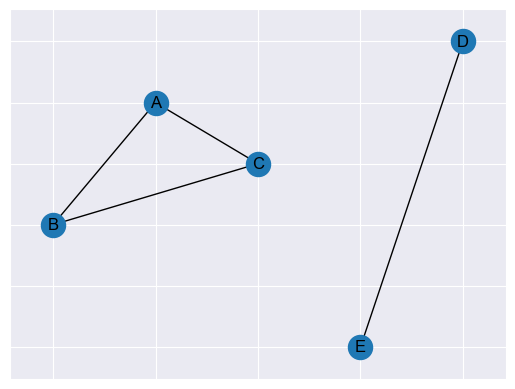

In [18]:
pos=nx.get_node_attributes(G,'pos')
# nx es el alias de la biblioteca 
# G es la variable a la que asignamos nuestro gráfico vacío 
# get_node_attributes es la función que obtiene los nodos en el grafo G
# pos es el diccionario de las posiciones de los nodos en el grafo. Es como si almancenara la posición de cada nodo: nodo1: (x1,y1) 
nx.draw_networkx(G, pos)
#draw_network es la función de NetworkK que permite dibujar el grafo G 
#si quitaramos pos, no colocaría cada nodo en las coordenadas que les designamos

Definiendo aristas con peso

{('A', 'B'): Text(0.4999981545843182, 0.4999981545843184, '0.5'),
 ('A', 'C'): Text(1.5000033932738002, 0.7499983033631001, '2.5'),
 ('B', 'C'): Text(0.9999989552889015, 0.24999973882222526, '1.3'),
 ('D', 'E'): Text(3.500010201358237, 0.25002550339559115, '1.0')}

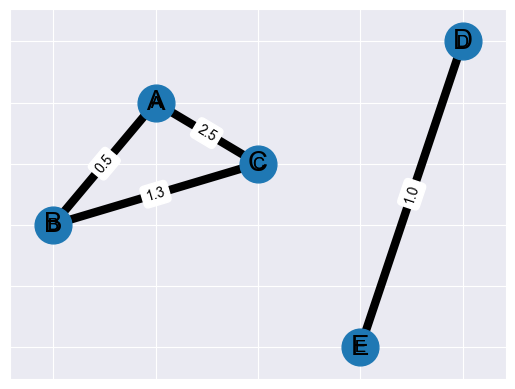

In [21]:
G.add_edge('A', 'B', weight=0.5)


G.add_edges_from([('B', 'C', {'weight': 1.3}), 
                  ('C', 'A', {'weight': 2.5}), 
                  ('D', 'E', {'weight': 1.0})])
#nodes
pos=nx.get_node_attributes(G,'pos')
nx.draw_networkx(G, pos, node_size=700)
#edges
nx.draw_networkx(G, pos, edgelist=G.edges(),width=6)
#labels
#node labels
nx.draw_networkx(G, pos, font_size=20)
#edge weight labels
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels) 

Eliminando aristas


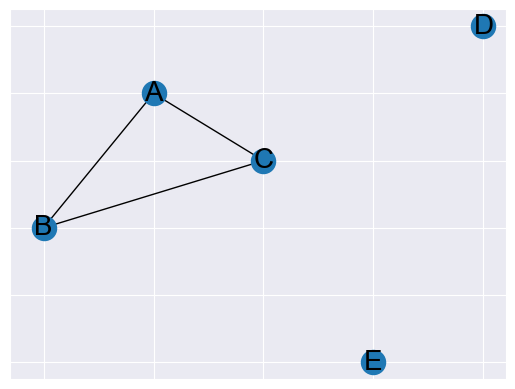

In [22]:
G.remove_edge('D','E')
nx.draw_networkx(G, pos, font_size=20)

Grafo a dataframe

In [23]:
G.adj #es el diccionario de cada nodo del grafo y a partir del nodo A, da las coordenadas de sus nodos vecinos, en este caso el de B y C. Así con cada nodo

AdjacencyView({'A': {'B': {'weight': 0.5}, 'C': {'weight': 2.5}}, 'B': {'A': {'weight': 0.5}, 'C': {'weight': 1.3}}, 'C': {'B': {'weight': 1.3}, 'A': {'weight': 2.5}}, 'D': {}, 'E': {}})

In [24]:
list(G.adjacency())
#Esta es otra forma de mostrar el diccionario de los nodos pero en forma de lista (esta me gusta más porque está más ordenado :) ) 

[('A', {'B': {'weight': 0.5}, 'C': {'weight': 2.5}}),
 ('B', {'A': {'weight': 0.5}, 'C': {'weight': 1.3}}),
 ('C', {'B': {'weight': 1.3}, 'A': {'weight': 2.5}}),
 ('D', {}),
 ('E', {})]

In [25]:
nx.to_pandas_edgelist(G)
#esta es una función para mostrar en forma de lista (o tabla) la distancia entre los nodos? Duda aquí 

,source,target,weight
0,A,B,0.5
1,A,C,2.5
2,B,C,1.3


In [26]:
nx.to_pandas_adjacency(G)
#Esta es como una matriz del peso de cada variable (nodo) y su distancia entre cada uno 

,A,B,C,D,E
A,0.0,0.5,2.5,0.0,0.0
B,0.5,0.0,1.3,0.0,0.0
C,2.5,1.3,0.0,0.0,0.0
D,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,0.0
